# Solução do  problema específico

Upload de base de dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving biologia.csv to biologia.csv


In [ ]:
FileName = 'biologia.csv'

# Regressão pós agrupamento

In [ ]:
import random
random.seed(50) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#FileName = "biologia.csv"

data1 = pd.read_csv(FileName, header=(0))

data1 = data1.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data1[data1.columns[-4]]), dtype=str)  
print("Classes", classes)
print("Número de linhas e colunas na matriz de atributos:", data1.shape)
attributes = list(data1.columns)
data1.head(10)

Classes ['1' '0']
Número de linhas e colunas na matriz de atributos: (4501, 34)


,Curso,Semestre,Período,Nome.da.Disciplina,ID.da.Disciplina,Referencia.de.Registro,ID.do.Aluno,VAR24,VAR25,VAR28,VAR31,VAR31b,VAR31c,VAR32a,VAR32b,VAR32c,VAR32d,PRIMEIRA_PROVA,SEGUNDA_PROVA,MEDIA_PROVAS,FORUM01,FORUM02,FORUM03,FORUM04,MEDIA_FORUM,WEBQUEST01,WEBQUEST02,MEDIA_WEBQUEST,DESEMPENHO,DESEM_BIN,AGRUP_1_BIN,AGRUP_2_BIN,AGRUP_3_BIN,agrupamento
0,Biologia,2014.2,1,Física Aplicada à Biologia (1º),121,EstBio 0039,1253,0.000092,46.11,12,24,5,8,0,2,20,2,0.0,0.0,0.0,0,0,0,0,0.0,4,0,1.00,1.00,0,1,0,0,2
1,Biologia,2014.2,1,História da Biologia (1º),52,EstBio 0040,1253,0.000092,46.66,12,24,3,8,0,2,20,2,0.0,0.0,0.0,0,0,0,0,0.0,5,0,1.25,1.25,0,1,0,0,2
2,Biologia,2016.1,4,Filosofia da Educacao,35,EstBio 0046,1253,0.000000,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,5,0,1.25,1.25,0,1,0,0,2
3,Biologia,2014.2,1,Física Aplicada à Biologia (1º),121,EstBio 0064,1254,0.000000,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,1,0,0.25,0.25,0,1,0,0,2
4,Biologia,2014.2,1,Informática Aplicada à Biologia(1º),54,EstBio 0068,1254,0.000000,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,1,1,0.50,0.50,0,1,0,0,2
5,Biologia,2014.2,1,Física Aplicada à Biologia (1º),121,EstBio 0075,1305,0.000004,0.00,0,1,0,1,0,1,0,0,0.0,0.0,0.0,0,0,0,0,0.0,1,0,0.25,0.25,0,1,0,0,2
6,Biologia,2014.2,1,Informática Aplicada à Biologia(1º),54,EstBio 0077,1305,0.000004,0.00,0,1,0,1,0,1,0,0,0.0,0.0,0.0,0,0,0,0,0.0,1,1,0.50,0.50,0,1,0,0,2
7,Biologia,2016.1,4,Bioquimica I,33,EstBio 0092,1306,0.000000,0.00,0,2,0,2,1,1,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,1,0.25,0.25,0,1,0,0,2
8,Biologia,2016.1,8,Biotecnologia,39,EstBio 0184,211,0.000000,0.00,0,2,0,2,0,2,0,0,0.0,0.0,0.0,0,0,0,0,0.0,1,1,0.50,0.50,0,1,0,0,2
9,Biologia,2014.2,1,Física Aplicada à Biologia (1º),121,EstBio 0226,1361,0.000015,0.00,2,4,0,2,0,4,0,0,0.0,0.0,0.0,0,0,0,0,0.0,1,0,0.25,0.25,0,1,0,0,2


# Classificação Tensor Flow

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

print(tf.__version__)

2.4.1


In [ ]:
data_pan = data1[['VAR24',	'VAR25',	'VAR28',	'VAR31',	'VAR31b',	'VAR31c',	'VAR32a',	'VAR32b',	'VAR32c',	'VAR32d', 'agrupamento']]

In [ ]:
data_pan = data_pan[(data_pan > -0.1).all(1)]

In [ ]:
train_dataset = data_pan.sample(frac=0.8,random_state=0)
test_dataset = data_pan.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("agrupamento")
train_stats = train_stats.transpose()

print(train_stats)

media = train_stats['mean']
deviation = train_stats['std']

train_labels = train_dataset.pop('agrupamento')
test_labels = test_dataset.pop('agrupamento')

def norm(x):
  return (x - media) / deviation

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

x_train = normed_train_data.to_numpy()
x_test  = normed_test_data.to_numpy()
y_train = train_labels.to_numpy() -1
y_test  = test_labels.to_numpy() -1

nAtributes = len(x_train[0])

         count       mean        std  min        25%     50%      75%     max
VAR24   3598.0   3.503840   3.000469  0.0   1.586525   3.000    5.000   23.00
VAR25   3598.0  88.661348  60.916593  0.0  62.795000  72.385   84.265  271.33
VAR28   3598.0  51.052807  57.101103  0.0  14.000000  33.000   68.000  433.00
VAR31   3598.0  99.837966  77.456624  0.0  48.000000  82.000  132.000  600.00
VAR31b  3598.0  17.478321  14.621685  0.0   6.000000  15.000   25.000   89.00
VAR31c  3598.0  50.605058  28.523063  0.0  31.000000  47.000   67.000  167.00
VAR32a  3598.0  25.085603  26.013115  0.0   9.000000  17.000   33.000  296.00
VAR32b  3598.0  33.516676  32.913119  0.0  12.000000  24.000   46.000  378.00
VAR32c  3598.0  38.997499  33.062964  0.0  16.000000  32.000   53.000  350.00
VAR32d  3598.0   2.238188   5.022797  0.0   0.000000   0.000    2.000   61.00


In [ ]:
x_tensor_train = tf.convert_to_tensor(x_train, dtype=tf.float32) 
y_tensor_train = tf.convert_to_tensor(y_train, dtype=tf.uint8)
x_tensor_test = tf.convert_to_tensor(x_test, dtype=tf.float32) 
y_tensor_test = tf.convert_to_tensor(y_test, dtype=tf.uint8)

In [ ]:
model = tf.keras.Sequential([]);
model.add(tf.keras.Input(shape=(nAtributes,)))
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_tensor_train,y_tensor_train,epochs=200)

In [ ]:
test_loss, test_acc = model.evaluate(x_tensor_train,  y_tensor_train, verbose=2)

print('\nTest accuracy:', test_acc)

113/113 - 0s - loss: 0.2727 - accuracy: 0.8924

Test accuracy: 0.8924402594566345


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               1320      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4840      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 123       
Total params: 6,283
Trainable params: 6,283
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_proba = model.predict(x_test)
y_classes = np.argmax(y_proba, axis=-1)

In [ ]:
confusion_matrix(y_test, y_classes)
cm = confusion_matrix(y_test, y_classes)
print(classification_report(y_test, y_classes))

print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

           0       0.81      0.56      0.66       163
           1       0.66      0.69      0.67       199
           2       0.86      0.93      0.89       537

    accuracy                           0.81       899
   macro avg       0.77      0.72      0.74       899
weighted avg       0.81      0.81      0.80       899

Confusion matrix
[[ 91  39  33]
 [ 16 137  46]
 [  6  33 498]]


#SHAP Evaluation

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 5.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=2082b80c0a87044ef5ea11a66e6328585f692b9d61978193225028d63e3f7d1a
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
shap.initjs()

In [ ]:
x_shap = x_train

In [ ]:
explainer = shap.DeepExplainer(model,x_shap,)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


In [ ]:
Myshap_values = explainer.shap_values(x_shap)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
FeatureListTranslated = ['Media semanal de acessos',	'Tempo médio de resposta a uma postagem',	'Quantidade de timeouts',	'Quantidade de acessos',	'Dias distintos de acesso a disciplina',	'Dias distintos de acesso a plataforma',	'Acessos ao ambiente pela manhã',	'Acessos ao ambiente pela tarde',	'Acessos ao ambiente pela noite',	'Acessos ao ambiente pela madrugada']

In [ ]:
FeatureListTranslated = ['VAR24',	'VAR25',	'VAR28',	'VAR31',	'VAR31b',	'VAR31c',	'VAR32a',	'VAR32b',	'VAR32c',	'VAR32d']

In [ ]:
shap_grupo1 = Myshap_values[0]
shap_grupo2 = Myshap_values[1]
shap_grupo3 = Myshap_values[2]

In [ ]:
#shap.force_plot(explainer.expected_value[0],shap_grupo1,x_shap)

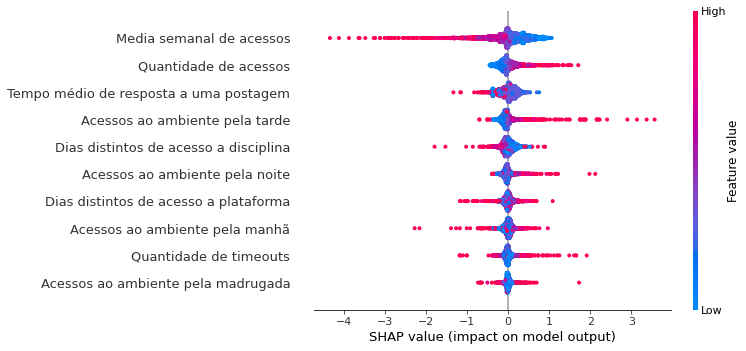

In [ ]:
shap.summary_plot(shap_grupo1,x_shap,feature_names =FeatureListTranslated)

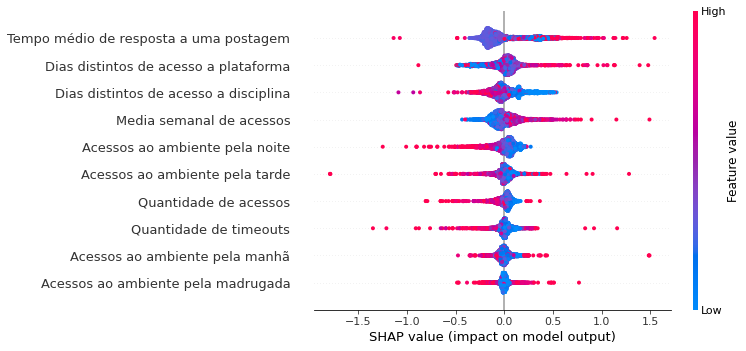

In [ ]:
shap.summary_plot(shap_grupo2,x_shap,feature_names =FeatureListTranslated)

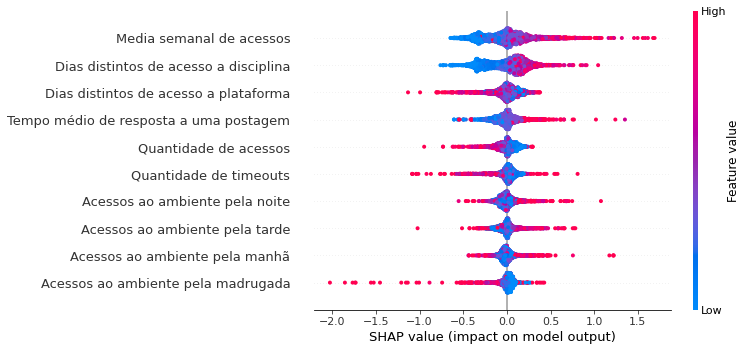

In [ ]:
shap.summary_plot(shap_grupo3,x_shap,feature_names =FeatureListTranslated)

# Explainer Kernel

In [ ]:
base = normed_train_data.sample(frac=0.1,random_state=42)

In [ ]:
explainerKernel = shap.KernelExplainer(model = model.predict, data = base, link = "identity")

Using 360 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
# Set the index of the specific example to explain
X_idx = 14

shap_value_single = explainerKernel.shap_values(X = normed_train_data.iloc[X_idx:X_idx+1,:], nsamples = 100)

In [ ]:
train_labels[X_idx:X_idx+1]

4313    3
Name: agrupamento, dtype: int64

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(base_value = explainerKernel.expected_value[2],
                shap_values = shap_value_single[2],
                features = normed_train_data.iloc[X_idx:X_idx+1,:]
                )

In [ ]:
Myshap_valuesKernel = explainerKernel.shap_values(base)

In [ ]:
shap_grupo1Kernel = Myshap_valuesKernel[0]
shap_grupo2Kernel = Myshap_valuesKernel[1]
shap_grupo3Kernel = Myshap_valuesKernel[2]

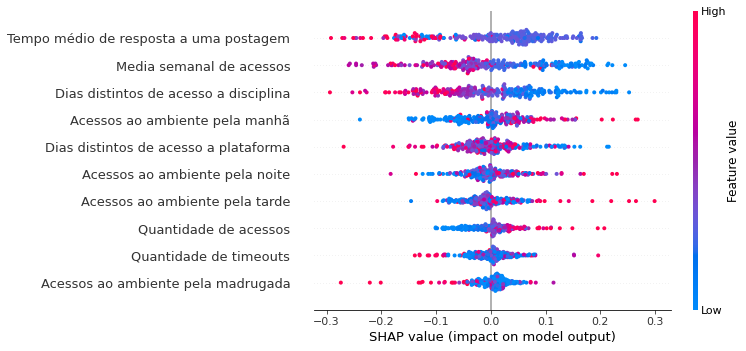

In [ ]:
shap.summary_plot(shap_grupo1Kernel,base,feature_names =FeatureListTranslated)

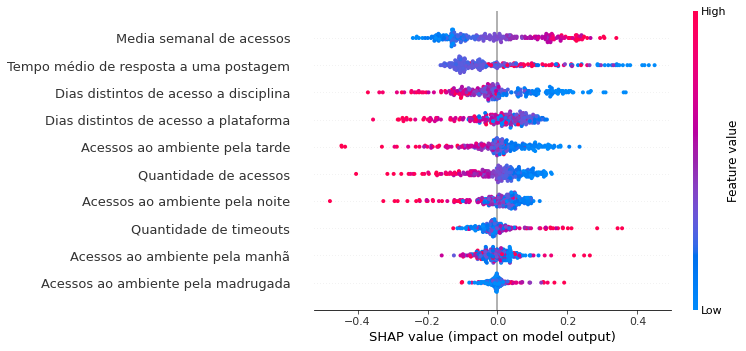

In [ ]:
shap.summary_plot(shap_grupo2Kernel,base,feature_names =FeatureListTranslated)

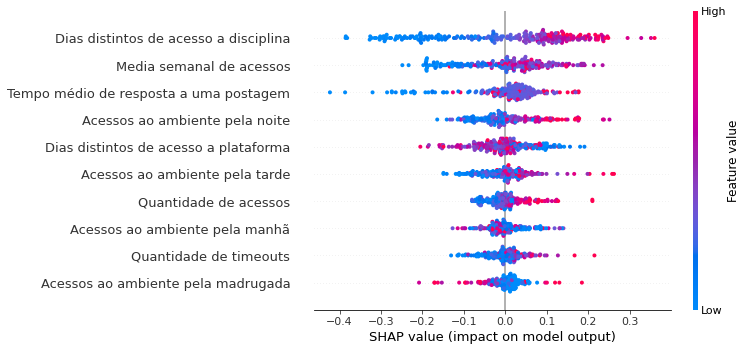

In [ ]:
shap.summary_plot(shap_grupo3Kernel,base,feature_names =FeatureListTranslated)

In [ ]:
shap.initjs()

shap.force_plot(base_value = explainerKernel.expected_value[0],
                shap_values = shap_grupo1Kernel,
                features = base
                )